In [20]:
#time series analysis

In [1]:

temp_city = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")
#forcasting temp with state  data , city  data and country data is done by using the following code:



<IPython.core.display.Javascript object>

To perform time series analysis on the provided data, you would typically follow these steps:

1. **Data Preparation**: Load the dataset and preprocess it if needed (e.g., handling missing values, converting data types).

2. **Exploratory Data Analysis (EDA)**: Understand the characteristics of the data through visualization and statistical summaries.

3. **Time Series Decomposition**: Decompose the time series into its components (trend, seasonality, and noise) to understand its underlying patterns.

4. **Model Selection**: Choose appropriate time series forecasting models based on the characteristics observed during EDA.

5. **Model Training**: Train the selected models using the historical data.

6. **Model Evaluation**: Evaluate the performance of the models using appropriate metrics.

7. **Forecasting**: Use the trained models to forecast future values of the time series.

8. **Visualization**: Visualize the forecasts and compare them with the actual values.

Since you mentioned applying all algorithms of time series, I'll list some common algorithms and techniques used in time series analysis:

1. **Moving Average (MA)**: A simple method for smoothing time series data by calculating the average of a sliding window of consecutive data points.

2. **Autoregressive (AR)**: A model that uses a linear combination of past values of the time series to predict future values.

3. **Autoregressive Integrated Moving Average (ARIMA)**: A popular model that combines autoregression, differencing, and moving average components for forecasting.

4. **Seasonal ARIMA (SARIMA)**: An extension of ARIMA that includes seasonal components for modeling seasonality in the data.

5. **Exponential Smoothing (ETS)**: A family of models that use exponentially weighted moving averages to forecast future values.

6. **Prophet**: A forecasting tool developed by Facebook that decomposes time series data into trend, seasonality, and holidays, and fits separate models to each component.

7. **Long Short-Term Memory (LSTM)**: A type of recurrent neural network (RNN) architecture often used for sequence prediction tasks like time series forecasting.

8. **Seasonal Decomposition of Time Series (STL)**: A method for decomposing time series data into seasonal, trend, and residual components using a robust loess decomposition.

9. **Vector Autoregression (VAR)**: A model that extends autoregression to multiple time series, allowing for the analysis of interdependencies among variables.

10. **Facebook's Prophet**: A forecasting tool developed by Facebook that decomposes time series data into trend, seasonality, and holidays, and fits separate models to each component.

Each of these algorithms has its own strengths and weaknesses, and the choice of algorithm depends on factors such as the characteristics of the data, the forecasting horizon, and computational resources available.

If you have a specific algorithm you would like to apply or if you need assistance with any particular step of the analysis, please let me know, and I can provide further guidance.

In [4]:
temp_city.Country.value_counts()

Country
India                                 36582
China                                 35444
Brazil                                12930
Turkey                                 9473
United States                          8455
Egypt                                  7589
Pakistan                               7355
Russia                                 6478
Canada                                 6478
Nigeria                                5763
Colombia                               4542
Indonesia                              4530
Australia                              4146
Saudi Arabia                           4098
Japan                                  4095
South Africa                           3762
Spain                                  3239
France                                 3239
United Kingdom                         3239
Italy                                  3239
Ukraine                                3239
Germany                                3239
Morocco                 

In [2]:
temp_city

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [9]:
temp_city.describe()
temp_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [10]:
temp_city['dt'] = pd.to_datetime(temp_city['dt'])

In [11]:
def fill_column_null_with_mean(data, column_name):
    if data[column_name].dtype in ['int64', 'float64']:
        mean_value = data[column_name].mean()
        data[column_name].fillna(mean_value, inplace=True)
    else:
        mode_value = data[column_name].mode()[0]  
        data[column_name].fillna(mode_value, inplace=True)
    return data


In [12]:
df = fill_column_null_with_mean(temp_city  , 'AverageTemperatureUncertainty')
df = fill_column_null_with_mean(temp_city  , 'AverageTemperature')
df = fill_column_null_with_mean(temp_city  , 'City')
df = fill_column_null_with_mean(temp_city  , 'Country')
df = fill_column_null_with_mean(temp_city  , 'Latitude')
df = fill_column_null_with_mean(temp_city  , 'Longitude')
print(df.isnull().sum())

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             239177 non-null  datetime64[ns]
 1   AverageTemperature             239177 non-null  float64       
 2   AverageTemperatureUncertainty  239177 non-null  float64       
 3   City                           239177 non-null  object        
 4   Country                        239177 non-null  object        
 5   Latitude                       239177 non-null  object        
 6   Longitude                      239177 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 12.8+ MB


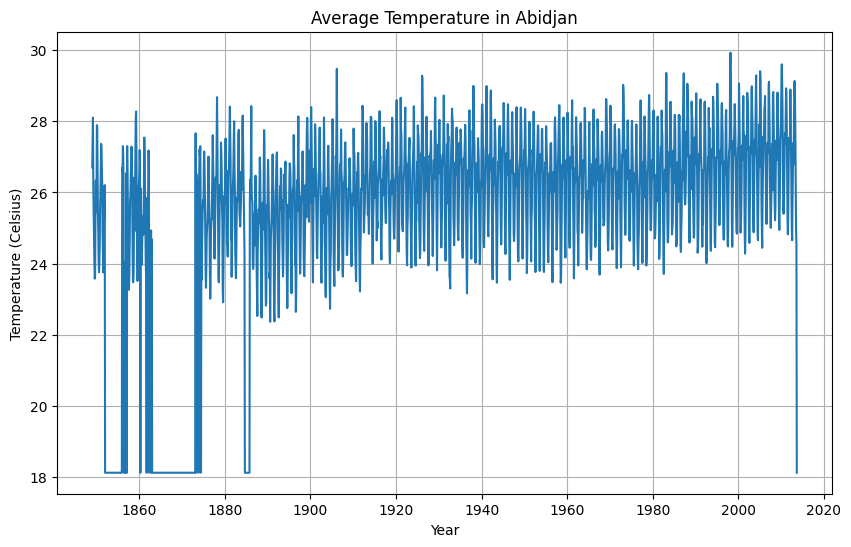

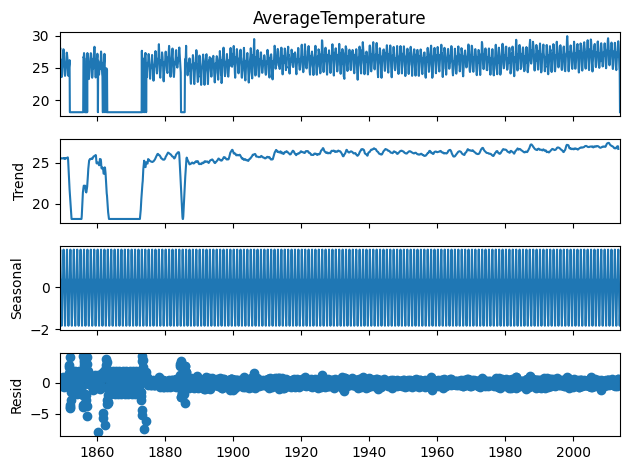

ADF Statistic: -3.4818485783777726
p-value: 0.008465683034799524
Critical Values:
  1%: -3.4337079123563106
  5%: -2.8630233240061367
  10%: -2.5675596618014462


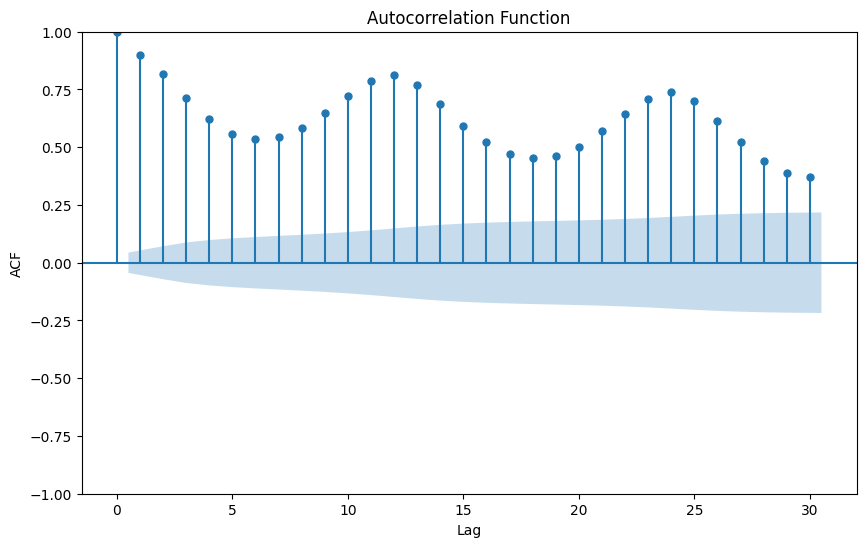

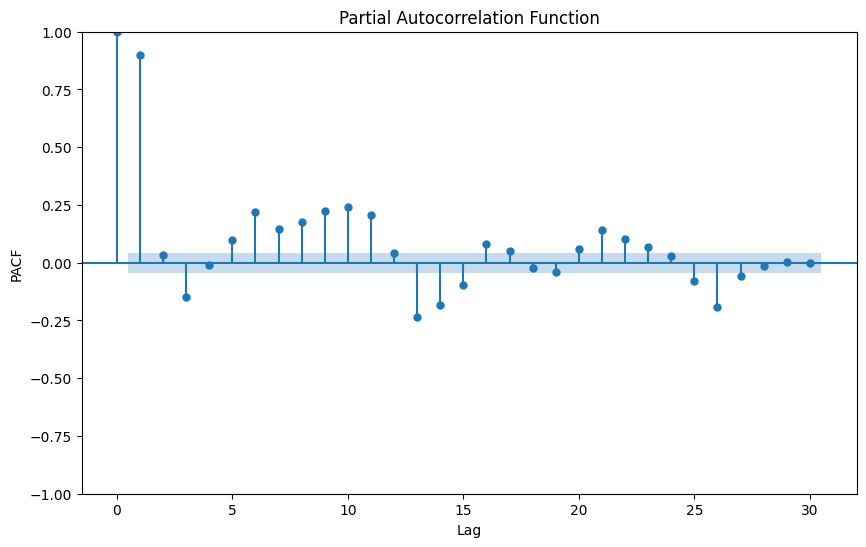

c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


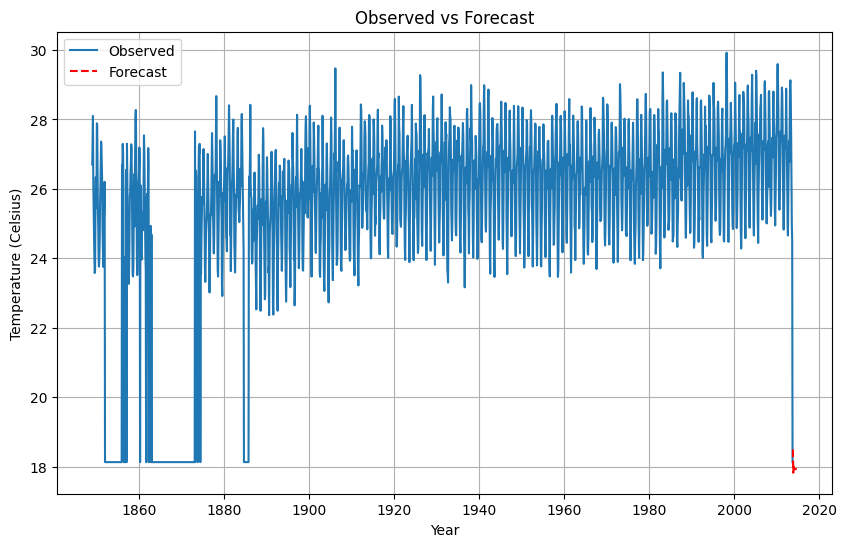

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


df = df.set_index('dt')
df = df.loc[df['City'] == 'Abidjan']

# Extract the temperature data
temperature_data = df['AverageTemperature']

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(temperature_data)
plt.title('Average Temperature in Abidjan')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.grid(True)
plt.show()

# Decompose the time series
result = seasonal_decompose(temperature_data, model='additive', period=12)
result.plot()
plt.show()

# Test for stationarity (ADF test)
adf_result = adfuller(temperature_data)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'  {key}: {value}')

# Plot ACF and PACF
plt.figure(figsize=(10, 6))
plot_acf(temperature_data, ax=plt.gca(), lags=30)
plt.title('Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(temperature_data, ax=plt.gca(), lags=30)
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

# Fit ARIMA model
model = ARIMA(temperature_data, order=(2, 1, 1))
fit_model = model.fit()

# Forecast
forecast = fit_model.forecast(steps=12)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(temperature_data, label='Observed')
plt.plot(forecast, color='red', linestyle='--', label='Forecast')
plt.title('Observed vs Forecast')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
pip install xgboost


     -------------------------------------- 99.8/99.8 MB 912.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
df

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1849-01-01,26.704000,1.435000,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-02-01,27.434000,1.362000,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-03-01,28.101000,1.612000,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-04-01,26.140000,1.387000,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-05-01,25.427000,1.200000,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...
2013-05-01,27.652000,0.160000,Abidjan,Côte D'Ivoire,5.63N,3.23W
2013-06-01,26.157000,0.245000,Abidjan,Côte D'Ivoire,5.63N,3.23W
2013-07-01,24.951000,0.221000,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [17]:
data = df.copy()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1977 entries, 1849-01-01 to 2013-09-01
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AverageTemperature             1977 non-null   float64
 1   AverageTemperatureUncertainty  1977 non-null   float64
 2   City                           1977 non-null   object 
 3   Country                        1977 non-null   object 
 4   Latitude                       1977 non-null   object 
 5   Longitude                      1977 non-null   object 
dtypes: float64(2), object(4)
memory usage: 108.1+ KB


In [30]:
data.drop(["City", "Latitude", "Longitude"], axis=1, inplace=True)


In [35]:
data.drop(["Country"], axis=1, inplace=True)

In [36]:
data

,AverageTemperature,AverageTemperatureUncertainty,value_lag_1,value_lag_2,value_lag_3
dt,,,,,
1849-07-01,24.058000,1.254000,24.844,25.427,26.140
1849-08-01,23.576000,1.265000,24.058,24.844,25.427
1849-09-01,23.662000,1.226000,23.576,24.058,24.844
1849-10-01,25.263000,1.175000,23.662,23.576,24.058
1849-11-01,26.332000,1.507000,25.263,23.662,23.576
...,...,...,...,...,...
2013-05-01,27.652000,0.160000,28.626,29.129,29.021
2013-06-01,26.157000,0.245000,27.652,28.626,29.129
2013-07-01,24.951000,0.221000,26.157,27.652,28.626


In [37]:
import pandas as pd
import numpy as np
import xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def create_lag_features(data, lag=1):
    df = data.copy()
    for i in range(1, lag + 1):
        df[f'value_lag_{i}'] = df['AverageTemperature'].shift(i)
    return df.dropna()

# Prepare data
lag = 3  # Number of lag features
data = create_lag_features(data, lag)

# Split data into training and test sets
train_size = 0.8
train, test = train_test_split(data, train_size=train_size, shuffle=False)

# Define XGBoost model
model = xgb.XGBRegressor()

# Train model
model.fit(train.drop('AverageTemperature', axis=1), train['AverageTemperature'])

# Make predictions
preds = model.predict(test.drop('AverageTemperature', axis=1))

# Evaluate model
mse = mean_squared_error(test['AverageTemperature'], preds)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.5846714956063241


In [38]:
data

,AverageTemperature,AverageTemperatureUncertainty,value_lag_1,value_lag_2,value_lag_3
dt,,,,,
1849-10-01,25.263000,1.175000,23.662,23.576,24.058
1849-11-01,26.332000,1.507000,25.263,23.662,23.576
1849-12-01,25.450000,1.838000,26.332,25.263,23.662
1850-01-01,25.803000,1.943000,25.450,26.332,25.263
1850-02-01,27.890000,1.430000,25.803,25.450,26.332
...,...,...,...,...,...
2013-05-01,27.652000,0.160000,28.626,29.129,29.021
2013-06-01,26.157000,0.245000,27.652,28.626,29.129
2013-07-01,24.951000,0.221000,26.157,27.652,28.626


In [6]:
temp_state = pd.read_csv("GlobalLandTemperaturesByState.csv")

temp_country = pd.read_csv("GlobalLandTemperaturesByCountry.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
temp_state.State.value_counts()

State
Vladimir              3239
Kursk                 3239
Krasnodar             3239
Kostroma              3239
Komi Permyak          3239
                      ... 
Western Australia     1935
Northern Territory    1901
Queensland            1901
Acre                  1901
Hawaii                1569
Name: count, Length: 241, dtype: int64

In [9]:
temp_country.Country.value_counts()

Country
Åland                                  3239
Faroe Islands                          3239
Greece                                 3239
Germany                                3239
Saint Pierre And Miquelon              3239
                                       ... 
Northern Mariana Islands               1329
Guam                                   1329
Heard Island And Mcdonald Islands       788
French Southern And Antarctic Lands     788
Antarctica                              764
Name: count, Length: 243, dtype: int64

In [10]:
temp_city.City.value_counts()

City
Rome          3239
Istanbul      3239
Montreal      3239
Madrid        3239
Chicago       3239
              ... 
Kano          1893
Durban        1881
Cape Town     1881
Umm Durman    1857
Lima          1591
Name: count, Length: 100, dtype: int64

In [73]:
temp_state

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [74]:
temp_country

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [75]:
temp_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [77]:
temp_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


In [78]:
temp_country['dt'] = pd.to_datetime(temp_country['dt'])
temp_state['dt'] = pd.to_datetime(temp_state['dt'])

In [79]:
def fill_column_null_with_mean(data, column_name):
    if data[column_name].dtype in ['int64', 'float64']:
        mean_value = data[column_name].mean()
        data[column_name].fillna(mean_value, inplace=True)
    else:
        mode_value = data[column_name].mode()[0]  
        data[column_name].fillna(mode_value, inplace=True)
    return data
temp_country = fill_column_null_with_mean(temp_country  , 'AverageTemperature')
temp_country = fill_column_null_with_mean(temp_country  , 'AverageTemperatureUncertainty')
temp_state = fill_column_null_with_mean(temp_state  , 'AverageTemperature')
temp_state = fill_column_null_with_mean(temp_state  , 'AverageTemperatureUncertainty')

print(temp_country.isnull().sum())
print(temp_state.isnull().sum())

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64
dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
State                            0
Country                          0
dtype: int64


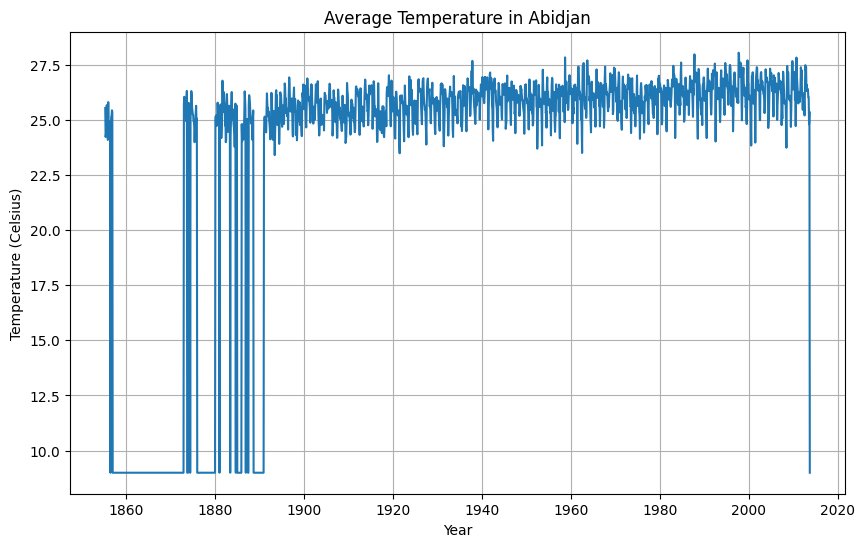

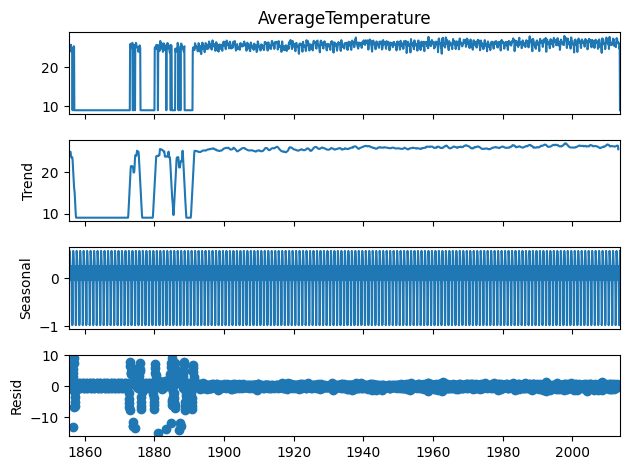

ADF Statistic: -3.3544730601792923
p-value: 0.012612319265383157
Critical Values:
  1%: -3.433844279577887
  5%: -2.8630835276091933
  10%: -2.567591717680237


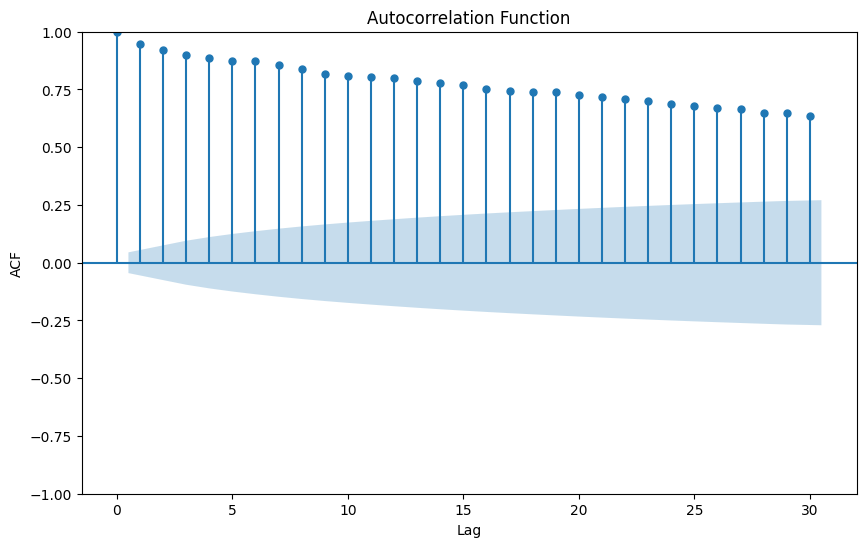

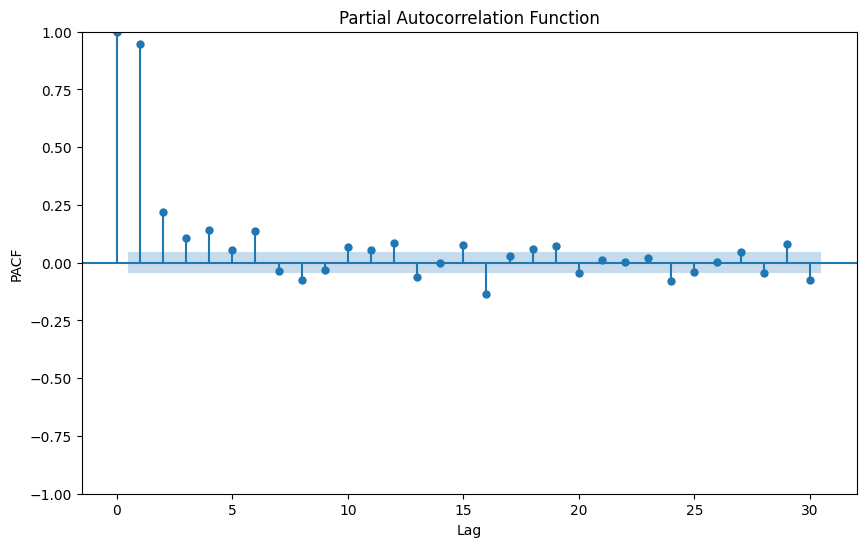

c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\su

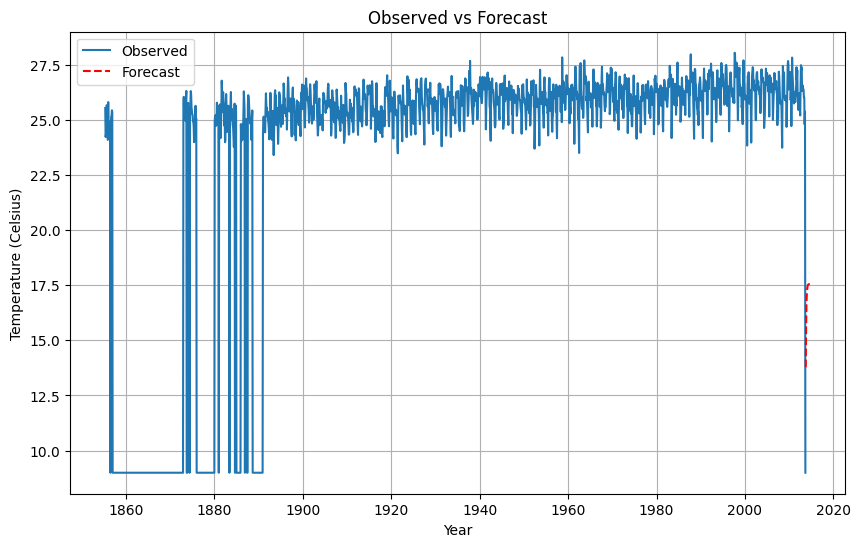

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

df = temp_state.copy()
df = df.set_index('dt')
df = df.loc[df['State'] == 'Acre']

# Extract the temperature data
temperature_data = df['AverageTemperature']

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(temperature_data)
plt.title('Average Temperature in Abidjan')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.grid(True)
plt.show()

# Decompose the time series
result = seasonal_decompose(temperature_data, model='additive', period=12)
result.plot()
plt.show()

# Test for stationarity (ADF test)
adf_result = adfuller(temperature_data)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'  {key}: {value}')

# Plot ACF and PACF
plt.figure(figsize=(10, 6))
plot_acf(temperature_data, ax=plt.gca(), lags=30)
plt.title('Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(temperature_data, ax=plt.gca(), lags=30)
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

# Fit ARIMA model
model = ARIMA(temperature_data, order=(2, 1, 1))
fit_model = model.fit()

# Forecast
forecast = fit_model.forecast(steps=12)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(temperature_data, label='Observed')
plt.plot(forecast, color='red', linestyle='--', label='Forecast')
plt.title('Observed vs Forecast')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.grid(True)
plt.show()


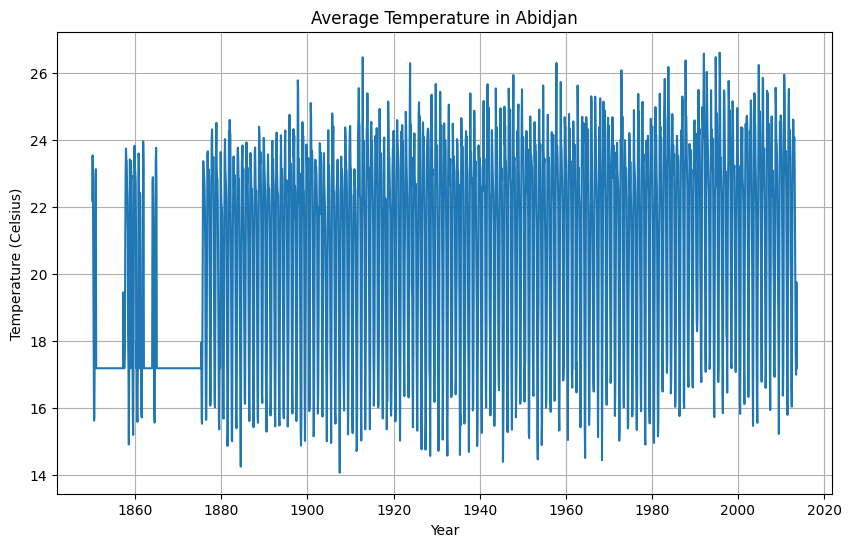

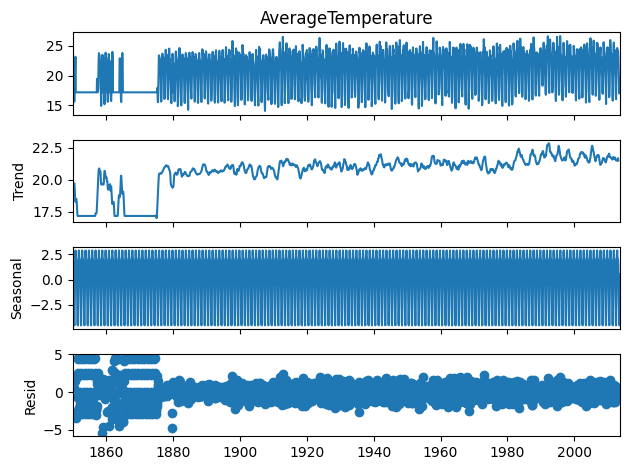

ADF Statistic: -3.1452254374536572
p-value: 0.02338235322456137
Critical Values:
  1%: -3.433728732020579
  5%: -2.8630325156796914
  10%: -2.567564555950673


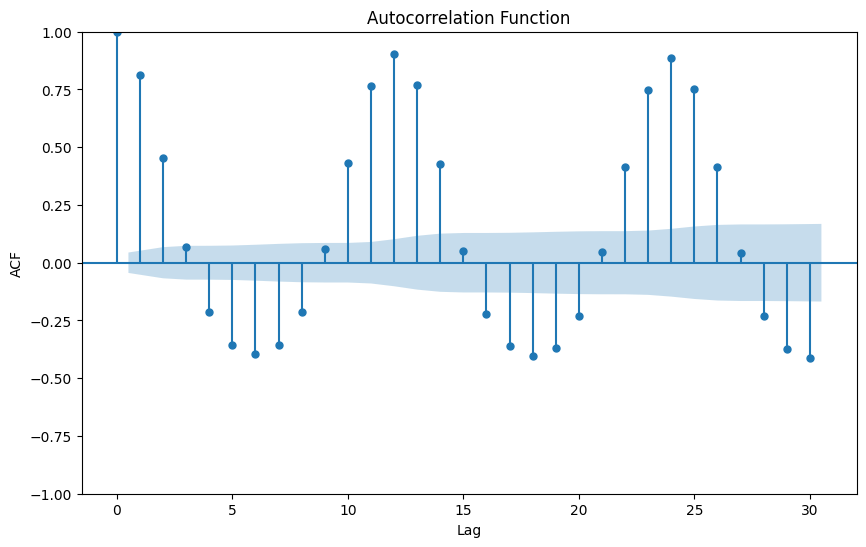

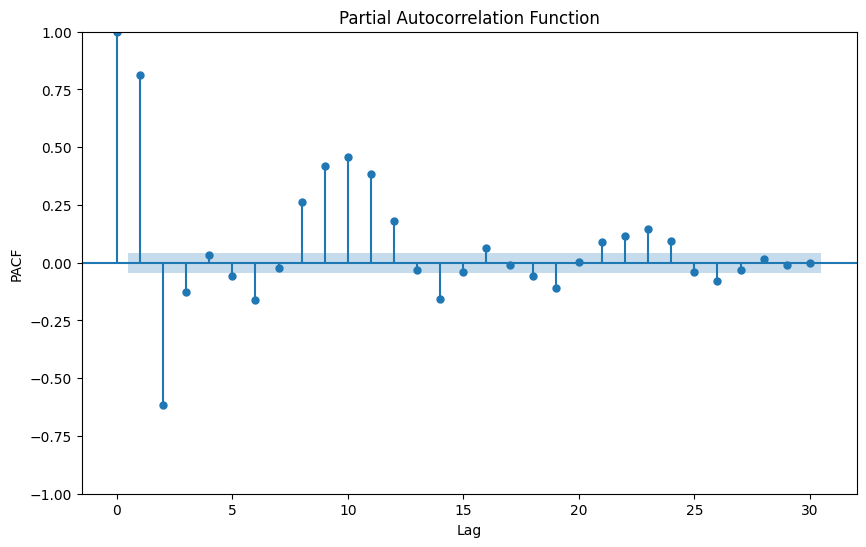

c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\su

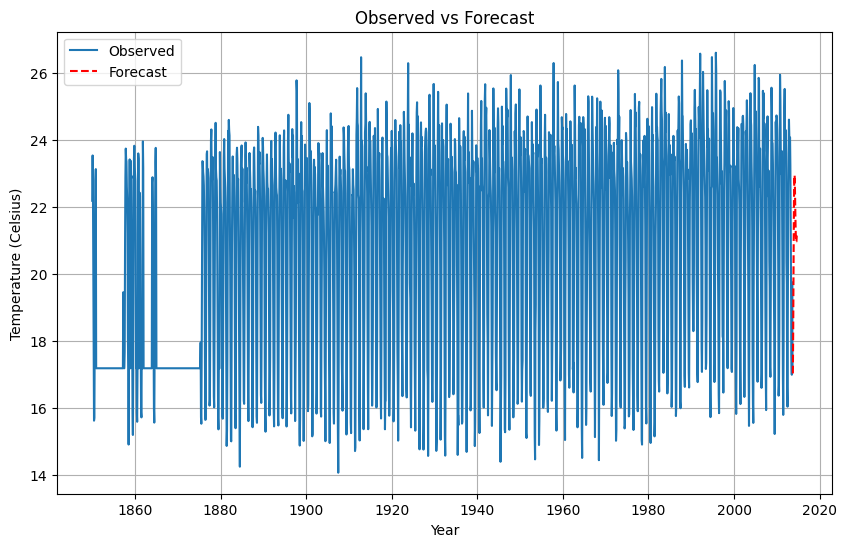

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

df = temp_country.copy()
df = df.set_index('dt')
df = df.loc[df['Country'] == 'Zimbabwe']

# Extract the temperature data
temperature_data = df['AverageTemperature']

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(temperature_data)
plt.title('Average Temperature in Abidjan')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.grid(True)
plt.show()

# Decompose the time series
result = seasonal_decompose(temperature_data, model='additive', period=12)
result.plot()
plt.show()

# Test for stationarity (ADF test)
adf_result = adfuller(temperature_data)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'  {key}: {value}')

# Plot ACF and PACF
plt.figure(figsize=(10, 6))
plot_acf(temperature_data, ax=plt.gca(), lags=30)
plt.title('Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(temperature_data, ax=plt.gca(), lags=30)
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

# Fit ARIMA model
model = ARIMA(temperature_data, order=(2, 1, 1))
fit_model = model.fit()

# Forecast
forecast = fit_model.forecast(steps=12)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(temperature_data, label='Observed')
plt.plot(forecast, color='red', linestyle='--', label='Forecast')
plt.title('Observed vs Forecast')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
temp_country

In [83]:
import pandas as pd
from IPython.display import FileLink

temp_country.to_csv('temp_country.csv', index=False)


FileLink('temp_country.csv')
temp_state.to_csv('temp_state.csv', index=False)

FileLink('temp_state.csv')

temp_city.to_csv('temp_city.csv', index=False)

FileLink('temp_city.csv')


c:\Users\suyog\OneDrive\Desktop\Fireblaze\Machine-Learning-And-Climate-Change-master\temp_city.csv

In [18]:
pip install fbprophet


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Cython-3.0.8-cp311-cp311-win_amd64.whl (2.8 MB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.9.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached holidays-0.42-py3-none-any.whl (917 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached tqdm-4.66.2-py3-none-any.whl (78 kB)
  Using cached PyMeeus-0.5.12.tar.gz (5.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached ephem-4.1.5-cp311-cp311-win_amd64.whl (1.4 MB)
  Using cached aiohttp-3.9.3-cp311-cp311-win_amd64.whl (365 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached pystan-3.8.0-py3-none-any.whl (13 kB)
  Us

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\suyog\AppData\Local\Temp\pip-install-wil8dn2l\pystan_8a93d52c813f4835be60d31ee2f45486\setup.py", line 122, in <module>
          from Cython.Build.Inline import _get_build_extension
      ModuleNotFoundError: No module named 'Cython'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
pip install fbprophet== 24.0


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement fbprophet== (from versions: 0.1.post1, 0.1.1, 0.2, 0.2.1, 0.3.post1, 0.3.post2, 0.4, 0.4.post1, 0.4.post2, 0.5, 0.6, 0.7, 0.7.1)
ERROR: No matching distribution found for fbprophet==

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import fbprophet
from fbprophet import Prophet

# Load the dataset
df = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
df['dt'] = pd.to_datetime(df['dt'])

df = df.fillna(df.mean())

# Filter data for the city of interest (Abidjan)
df_abidjan = df[df['City'] == 'Abidjan'][['dt', 'AverageTemperature']]

# Rename columns as expected by Prophet
df_abidjan.columns = ['ds', 'y']

# Fit Prophet model
model = Prophet()
model.fit(df_abidjan)

# Make future dataframe for forecasting
future = model.make_future_dataframe(periods=12, freq='M')

# Forecast
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title('Prophet Forecast for Average Temperature in Abidjan')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.grid(True)
plt.show()


ModuleNotFoundError: No module named 'fbprophet'

In [ ]:

# Load the dataset
df = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
df['dt'] = pd.to_datetime(df['dt'])

df = df.fillna(df.mean())

# List of cities
cities = df['City'].unique()

# Loop through each city
for city in cities:
    # Filter data for the city of interest
    df_city = df[df['City'] == city][['dt', 'AverageTemperature']]
    
    # Rename columns as expected by Prophet
    df_city.columns = ['ds', 'y']
    
    # Fit Prophet model
    model = Prophet()
    model.fit(df_city)
    
    # Make future dataframe for forecasting
    future = model.make_future_dataframe(periods=12, freq='M')
    
    # Forecast
    forecast = model.predict(future)
    
    # Plot forecast
    fig = model.plot(forecast)
    plt.title(f'Prophet Forecast for Average Temperature in {city}')
    plt.xlabel('Year')
    plt.ylabel('Temperature (Celsius)')
    plt.grid(True)
    plt.show()
